In [1]:
import networkx as nx
import osmnx as ox
from shapely.geometry import Point, LineString
import plotly_express as px
import pandas as pd
import geopandas as gpd

In [2]:
ox.config(use_cache=True, log_console=True) #For debugging

2021-09-24 13:04:14 Configured OSMnx 1.1.1
2021-09-24 13:04:14 HTTP response caching is on


In [3]:
def create_rochester_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
        roc_graph = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        roc_graph = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return roc_graph

2021-09-24 13:04:15 Retrieved response from cache file "cache/122893a9c77ace471118d977e4561a9f45117fb9.json"
2021-09-24 13:04:15 Geocoded "Rochester" to (43.157285, -77.615214)
2021-09-24 13:04:15 Created bbox 2500 m from (43.157285, -77.615214): 43.17976800838733,43.134801991612676,-77.58439335186361,-77.64603464813638
2021-09-24 13:04:15 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-24 13:04:16 Projected GeoDataFrame to epsg:4326
2021-09-24 13:04:16 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-24 13:04:16 Projected GeoDataFrame to epsg:4326
2021-09-24 13:04:16 Requesting data within polygon from API in 1 request(s)
2021-09-24 13:04:16 Retrieved response from cache file "cache/66eb9a81695e56cf27dbddcfd75fd7d9ad62f64d.json"
2021-09-24 13:04:16 Got all network data within polygon from API in 1 request(s)
2021-09-24 13:04:16 Creating graph from downloaded OSM data...

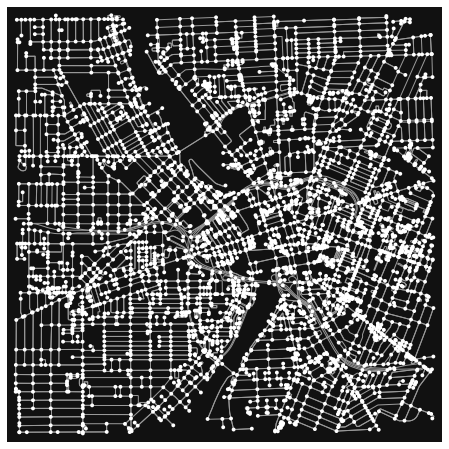

2021-09-24 13:04:23 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
roc_graph = create_rochester_graph('Rochester', 2500, 'drive_service')
ox.plot_graph(roc_graph)

2021-09-24 13:06:37 Begin plotting the graph...
2021-09-24 13:06:38 Created edges GeoDataFrame from graph
2021-09-24 13:06:39 Created nodes GeoDataFrame from graph


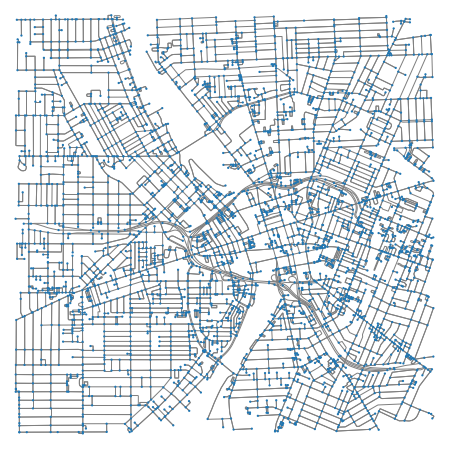

2021-09-24 13:06:39 Finished plotting the graph


In [8]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(roc_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)
# Sample bounding box in Rochester, NY - Plymouth exchange - Mayors Heights
north, south, east, west = 43.152740,43.15447,-77.605565,-77.602289

2021-09-24 13:06:56 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-24 13:06:56 Projected GeoDataFrame to epsg:4326
2021-09-24 13:06:56 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-24 13:06:56 Projected GeoDataFrame to epsg:4326
2021-09-24 13:06:56 Requesting data within polygon from API in 1 request(s)
2021-09-24 13:06:56 Retrieved response from cache file "cache/9a1e7235e601972877e757968a13d39320eb6109.json"
2021-09-24 13:06:56 Got all network data within polygon from API in 1 request(s)
2021-09-24 13:06:56 Creating graph from downloaded OSM data...
2021-09-24 13:06:56 Created graph with 2879 nodes and 4257 edges
2021-09-24 13:06:56 Added length attributes to graph edges
2021-09-24 13:06:56 Identifying all nodes that lie outside the polygon...
2021-09-24 13:06:56 Created nodes GeoDataFrame from graph
2021-09-24 13:06:56 Created r-tree spatial index for 2879 geometr

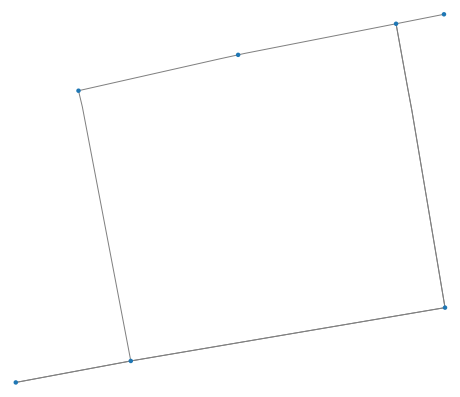

2021-09-24 13:06:57 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
# create a network from the above bounded box
box_graph = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(box_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [12]:
box_graph = ox.add_edge_speeds(box_graph) #Impute
box_graph = ox.add_edge_travel_times(box_graph) #Travel time
source = (43.152740, -77.605565) #Highland Park
destination = (43.15447, -77.602289)   #West Irondequoit
source_node = ox.get_nearest_node(box_graph, source)
destination_node = ox.get_nearest_node(box_graph, destination)
# Calculate the shortest path
path = nx.shortest_path(box_graph, source_node, destination_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(box_graph, path, route_linewidth=3, node_size=0, bgcolor='k');

2021-09-24 13:09:15 Created edges GeoDataFrame from graph


ValueError: this graph's edges have no preexisting `maxspeed` attribute values so you must pass `hwy_speeds` or `fallback` arguments.

In [6]:
node_source = []
node_destination = []
X_to = []
Y_to = []
X_from = []
Y_from = []
length = []
travel_time = []
for a, b in zip(path[:-1], path[1:]):
    node_source.append(a)
    node_destination.append(b)
    length.append(round(roc_graph.edges[(a, b, 0)]['length']))
    travel_time.append(round(roc_graph.edges[(a, b, 0)]['travel_time']))
    X_from.append(roc_graph.nodes[a]['x'])
    Y_from.append(roc_graph.nodes[a]['y'])
    X_to.append(roc_graph.nodes[b]['x'])
    Y_to.append(roc_graph.nodes[b]['y'])

In [7]:
df = pd.DataFrame(list(zip(node_source, node_destination, X_from, Y_from, X_to, Y_to, length, travel_time)),
columns =['node_source', 'node_destination', 'X_from', 'Y_from', 'X_to', 'Y_to', 'length', 'travel_time'])
df.head()

,node_source,node_destination,X_from,Y_from,X_to,Y_to,length,travel_time
0,212711088,6863491042,-77.595508,43.142408,-77.596055,43.142662,53,4
1,6863491042,212711081,-77.596055,43.142662,-77.597028,43.143370,112,8
2,212711081,6950355751,-77.597028,43.143370,-77.597459,43.143770,57,4
3,6950355751,6950355754,-77.597459,43.143770,-77.598380,43.144625,121,9
4,6950355754,212711079,-77.598380,43.144625,-77.599238,43.145524,122,9


In [10]:
def create_line_gdf(df):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X_from, df.Y_from))
    gdf["geometry_to"] = [Point(xy) for xy in zip(gdf.X_to, gdf.Y_to)]
    gdf['line'] = gdf.apply(lambda row: LineString([row['geometry_to'], row['geometry']]), axis=1)
    line_gdf = gdf[["node_source","node_destination","length","travel_time", "line"]].set_geometry('line')
    return line_gdf

In [11]:
line_gdf = create_line_gdf(df)

<AxesSubplot:>

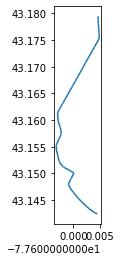

In [12]:
line_gdf.plot()

In [13]:
line_gdf.head()

,node_source,node_destination,length,travel_time,line
0,212711088,6863491042,53,4,"LINESTRING (-77.59605 43.14266, -77.59551 43.1..."
1,6863491042,212711081,112,8,"LINESTRING (-77.59703 43.14337, -77.59605 43.1..."
2,212711081,6950355751,57,4,"LINESTRING (-77.59746 43.14377, -77.59703 43.1..."
3,6950355751,6950355754,121,9,"LINESTRING (-77.59838 43.14463, -77.59746 43.1..."
4,6950355754,212711079,122,9,"LINESTRING (-77.59924 43.14552, -77.59838 43.1..."


In [14]:
df.tail()

,index,node_source,node_destination,X_from,Y_from,X_to,Y_to,length,travel_time,geometry,geometry_to
61,61,212685673,212685678,-77.595189,43.176419,-77.595250,43.177343,103,8,POINT (-77.59519 43.17642),POINT (-77.59524999999999 43.177343)
62,62,212685678,212685682,-77.595250,43.177343,-77.595304,43.178109,85,6,POINT (-77.59525 43.17734),POINT (-77.595304 43.178109)
63,63,212685682,212685686,-77.595304,43.178109,-77.595351,43.178848,82,6,POINT (-77.59530 43.17811),POINT (-77.59535099999999 43.178848)
64,64,212685686,212685688,-77.595351,43.178848,-77.595379,43.179348,56,4,POINT (-77.59535 43.17885),POINT (-77.59537899999999 43.179348)
65,65,212685688,212685691,-77.595379,43.179348,-77.595383,43.179460,12,1,POINT (-77.59538 43.17935),POINT (-77.595383 43.17946)


In [16]:
start = df[df["node_source"] == source_node]
end = df[df["node_destination"] == destination_node]

In [17]:
start

,index,node_source,node_destination,X_from,Y_from,X_to,Y_to,length,travel_time,geometry,geometry_to
0,0,212711088,6863491042,-77.595508,43.142408,-77.596055,43.142662,53,4,POINT (-77.59551 43.14241),POINT (-77.5960549 43.1426618)


In [18]:
end

,index,node_source,node_destination,X_from,Y_from,X_to,Y_to,length,travel_time,geometry,geometry_to
65,65,212685688,212685691,-77.595379,43.179348,-77.595383,43.17946,12,1,POINT (-77.59538 43.17935),POINT (-77.595383 43.17946)


In [26]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lon= "X_from", lat="Y_from", zoom=12)

In [20]:
fig = px.scatter_mapbox(df, lon= "X_from", lat="Y_from", width=800, height=400, zoom=12)
fig.add_trace(px.line_mapbox(df, lon= "X_from", lat="Y_from").data[0])

In [22]:
fig = px.scatter_mapbox(df, lon= "X_from", lat="Y_from", zoom=13, width=1000, height=800, animation_frame="index",mapbox_style="dark")
fig.data[0].marker = dict(size = 12, color="black")
fig.add_trace(px.scatter_mapbox(start, lon= "X_from", lat="Y_from").data[0])
fig.data[1].marker = dict(size = 15, color="red")
fig.add_trace(px.scatter_mapbox(end, lon= "X_from", lat="Y_from").data[0])
fig.data[2].marker = dict(size = 15, color="green")
fig.add_trace(px.line_mapbox(df, lon= "X_from", lat="Y_from").data[0])
fig